In [65]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

my_data = pd.read_csv("sales.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [66]:
my_data.shape

(640840, 10)

In [67]:
my_data.head()


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [68]:
my_data.isnull().sum() # check for missing values


Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [69]:
my_data.drop(columns=["Unnamed: 0"], inplace=True) #dropping the unnamed column. 


In [70]:
# Convert 'date' to datetime (if not already converted)
if "date" in my_data.columns:
    my_data["date"] = pd.to_datetime(my_data["date"])

    # Extract useful time-based features
    my_data["year"] = my_data["date"].dt.year
    my_data["month"] = my_data["date"].dt.month
    my_data["week"] = my_data["date"].dt.isocalendar().week.astype(int)  # Explicitly convert to int
    my_data["day"] = my_data["date"].dt.day
    my_data["weekday"] = my_data["date"].dt.weekday.astype(int)  # Explicitly convert to int

    # 🚨 Drop the original 'date' column to prevent errors
    my_data.drop(columns=["date"], inplace=True)

# 🚨 Final check: Print datatypes to confirm no datetime remains
print(my_data.dtypes)  # 'date' should NOT be listed, 'weekday' should be int64


store_ID                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
year                    int32
month                   int32
week                    int64
day                     int32
weekday                 int64
dtype: object


In [77]:
# Check if 'date' exists before dropping
if "date" in my_data.columns:
    my_data.drop(columns=["date"], inplace=True)

In [74]:
# Converting state holiday into integer. 

my_data["state_holiday"] = my_data["state_holiday"].astype("category").cat.codes


In [ ]:
print(my_data.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  state_holiday  \
0       366            4                  517     1          0              0   
1       394            6                  694     1          0              0   
2       807            4                  970     1          1              0   
3       802            2                  473     1          1              0   
4       726            4                 1068     1          1              0   

   school_holiday  sales  year  month  week  day    weekday  
0               0   4422  2013      4    16   18 2013-04-18  
1               0   8297  2015      4    15   11 2015-04-11  
2               0   9729  2013      8    35   29 2013-08-29  
3               0   6513  2013      5    22   28 2013-05-28  
4               0  10882  2013     10    41   10 2013-10-10  


In [75]:
my_data.dtypes

store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday           int8
school_holiday         int64
sales                  int64
year                   int32
month                  int32
week                   int64
day                    int32
weekday                int64
dtype: object

In [ ]:
print(my_data.describe())

            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   
75%       837.000000       6.000000           838.000000       1.000000   
max      1115.000000       7.000000          5458.000000       1.000000   
std       321.878521       1.996478           464.094416       0.375470   

           promotion  state_holiday  school_holiday          sales  \
count  640840.000000  640840.000000   640840.000000  640840.000000   
mean        0.381718       0.045475        0.178472    5777.469011   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.000000       0.000000        0

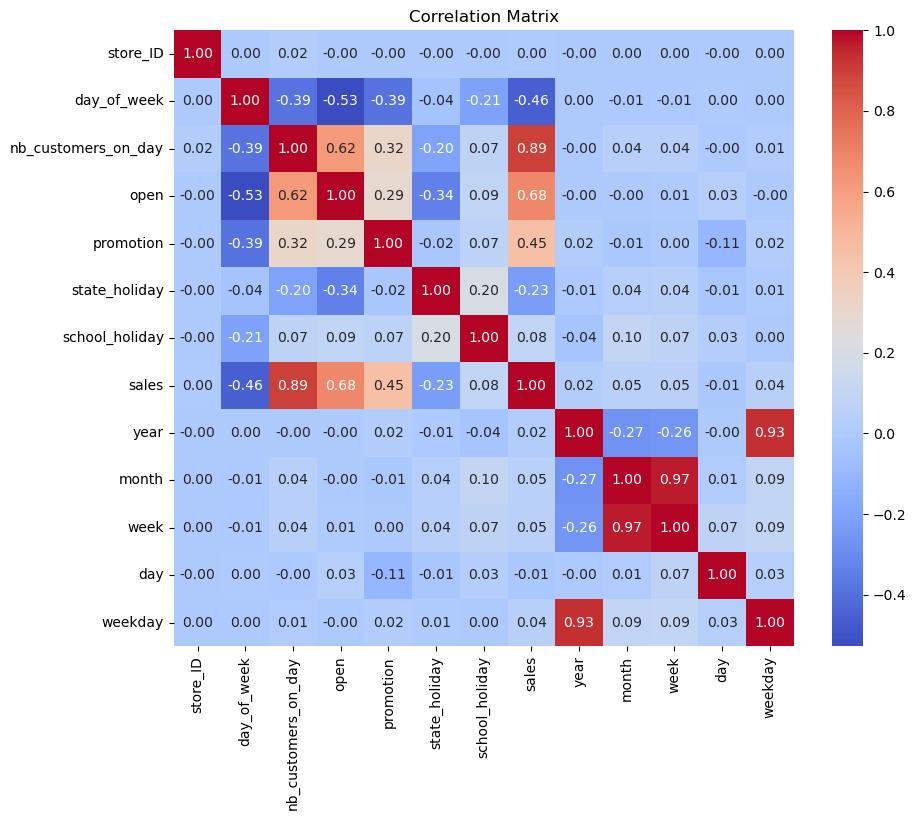

In [ ]:
# Compute correlation matrix
correlation_matrix = my_data.corr()

# Display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Impact of Promotions on Sales')

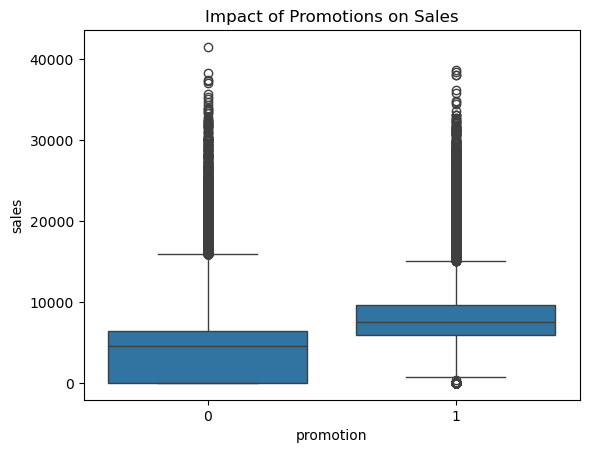

In [ ]:
sns.boxplot(x="promotion", y="sales", data=my_data)
plt.title("Impact of Promotions on Sales")


In [79]:
X = my_data.drop(columns=["sales"])  # Drop target variable
y = my_data["sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [80]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))



Random Forest Performance:
MAE: 544.5021797952687
MSE: 773510.6484954528
R² Score: 0.9476709260576294
